# Linear regression. Overlearning and regularization


In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [29]:
df = pd.read_csv('bikes_rent.csv')
df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


## Features
* _season_: 1 - spring, 2 - summer, 3 - autamn, 4 - winter
* _yr_: 0 - 2011, 1 - 2012
* _mnth_: from 1 to 12
* _holiday_: 0 - no holiday, 1 - holiday
* _weekday_: от 0 до 6
* _workingday_: 0 - not workingday, 1 - working day
* _weathersit_: weather assesment from 1 (sun) to 4 (rain)
* _temp_: temperature in Celsius
* _atemp_: how temperature is feeled in Celsius
* _hum_: humidity
* _windspeed(mph)_: wind speed mph
* _windspeed(ms)_: wind speed m/s
* _cnt_: rented bikes quantity, (our target feature)



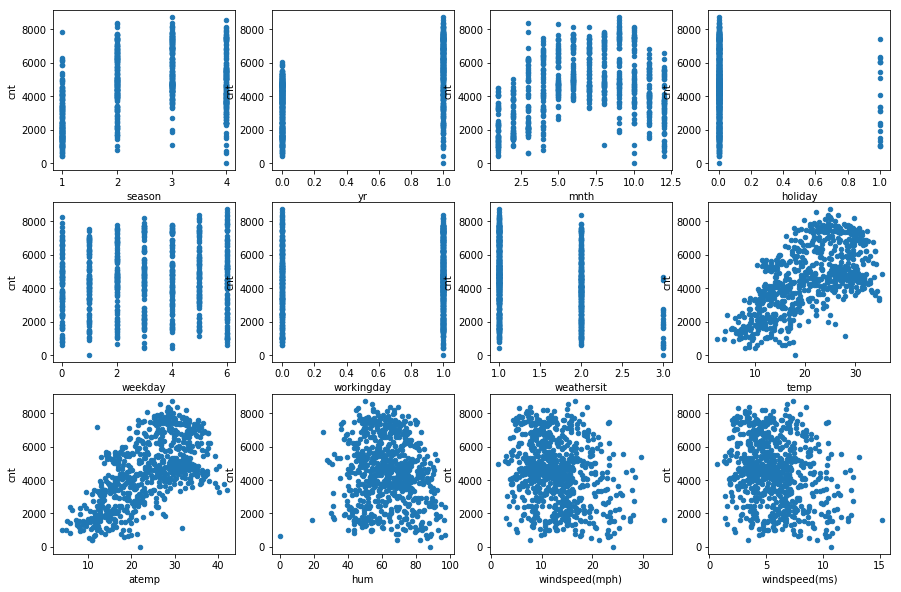

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(df.columns[:-1]):
    df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx / 4, idx % 4])

In [31]:
df_corr = df.corr()
df_corrwith = df.corrwith(df.cnt)


In our dataframe we have features, which are correlated with our target feature 

Some of features are common so we should count correlation of columns with real values

In [32]:
df_real = df[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']]
df_real_cor = df_real.corr()
print df_real_cor


                    temp     atemp       hum  windspeed(mph)  windspeed(ms)  \
temp            1.000000  0.991702  0.126963       -0.157944      -0.157944   
atemp           0.991702  1.000000  0.139988       -0.183643      -0.183643   
hum             0.126963  0.139988  1.000000       -0.248489      -0.248489   
windspeed(mph) -0.157944 -0.183643 -0.248489        1.000000       1.000000   
windspeed(ms)  -0.157944 -0.183643 -0.248489        1.000000       1.000000   
cnt             0.627494  0.631066 -0.100659       -0.234545      -0.234545   

                     cnt  
temp            0.627494  
atemp           0.631066  
hum            -0.100659  
windspeed(mph) -0.234545  
windspeed(ms)  -0.234545  
cnt             1.000000  


In [33]:
means = df.mean()
means

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

We should despite of colinear/common columns

In [34]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [35]:
df_shuffled = shuffle(df, random_state=123)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

In [36]:
from sklearn.linear_model import LinearRegression

In [55]:
linear_regr = LinearRegression()
linear_regr.fit(df.drop(columns = 'cnt'), df.cnt)
linear_regr.coef_

array([ 5.14274843e+02,  2.04393573e+03, -4.09633734e+01, -5.19386580e+02,
        6.84953373e+01,  1.21293702e+02, -6.06461035e+02,  4.89956085e+01,
        7.19147457e+01, -1.02301914e+01,  2.40106929e+12, -5.37119201e+12])

In [57]:
from sklearn.linear_model import Lasso, Ridge

In [61]:
lasso = Lasso()
lasso.fit(df.drop(columns = 'cnt'), df.cnt)
lasso.coef_


array([ 506.55127865, 2036.2316677 ,  -38.07827029, -484.65194619,
         68.93837479,  118.44759759, -604.56671189,   51.36326059,
         69.91273749,  -10.3527052 ,  -38.34106761,   -0.        ])

In [64]:
ridge = Ridge()
ridge.fit(df.drop(columns = 'cnt'), df.cnt)
ridge.coef_


array([ 507.80188185, 2029.0890542 ,  -38.47089728, -493.27801548,
         69.11396965,  121.52442503, -605.20555537,   49.3167676 ,
         71.78598727,  -10.3833945 ,  -31.93550169,  -14.27604026])

In [92]:

alphas = np.arange(1, 500, 50)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1])) # матрица весов размера (число регрессоров) x (число признаков)
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))
for alpha in enumerate(alphas):
    lasso_alpha = Lasso(alpha=alpha[1])
    lasso_alpha.fit(df.drop(columns = 'cnt'), df.cnt)
    coefs_lasso[alpha[0]] = lasso_alpha.coef_

for alpha in enumerate(alphas):
    ridge_alpha = Ridge(alpha=alpha[1])
    ridge_alpha.fit(df.drop(columns = 'cnt'), df.cnt)
    coefs_ridge[alpha[0]] = ridge_alpha.coef_


Визуализируем динамику весов при увеличении параметра регуляризации:

Text(0.5,1,u'Ridge')

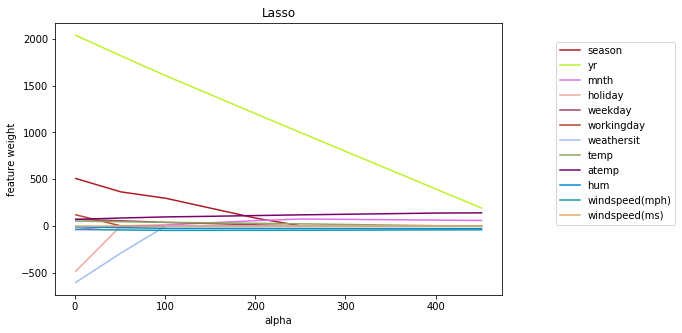

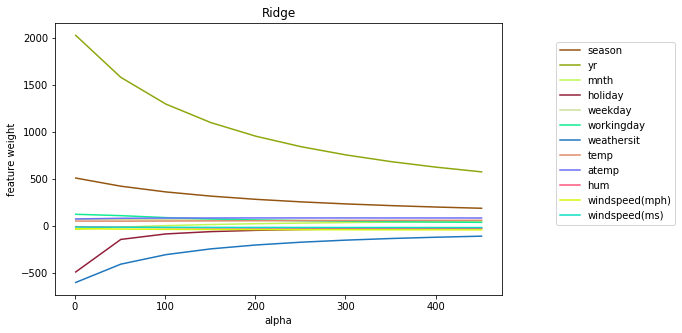

In [88]:
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

In [43]:
from sklearn.linear_model import LassoCV

In [102]:
alphas = np.arange(1, 100, 5)
lasso_cv = LassoCV(alphas=alphas)
lasso_cv.fit(df.drop(columns = 'cnt'), df.cnt)
print lasso_cv.alpha_
print lasso_cv.alphas_
print lasso_cv.coef_

1
[96 91 86 81 76 71 66 61 56 51 46 41 36 31 26 21 16 11  6  1]
[ 506.55127865 2036.2316677   -38.07827029 -484.65194619   68.93837479
  118.44759759 -604.56671189   51.36326059   69.91273749  -10.3527052
  -38.34106761   -0.        ]


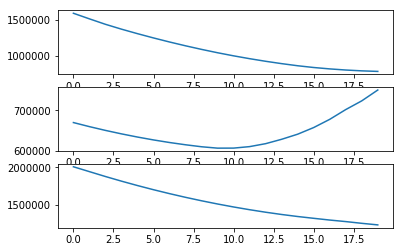

In [111]:
path = lasso_cv.mse_path_
for i in [0, 1, 2]:
    plt.subplot(3, 1 , i+1)
    plt.plot(path[:, i])
